In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import sweetviz as sv
from rdkit.Chem import rdChemReactions
from rdkit.Chem import Draw
from rdkit import Chem
from rdkit.Chem import Descriptors

from IPython.display import display
from PIL import Image
import io

In [2]:
def count_num_reaction(data):
    '''Count how many reactions there are'''
    rxnCount_data = data['Reaction ID'].nunique()
    print('Number of Reactions:', rxnCount_data)
    print('Number of Rows:', data.shape[0])


def view_reactionScheme(data, NumReaction_to_view, duplicate):
    '''pick and show reaction scheme '''

    if duplicate == 'drop duplicate':
        Reaction_data = data.drop_duplicates(subset=['Reaction ID'], keep='first')
        Reaction_data = Reaction_data.reset_index(drop=True)
    elif duplicate == 'keep duplicate': 
        Reaction_data = data.reset_index(drop=False)
    else:
        raise ValueError('Invalid input')
        
    if NumReaction_to_view > Reaction_data.shape[0]:
        raise ValueError('Number of reactions to view is more than the total number of reactions in the dataset')
    else:
        # Draw
        random_start = np.random.randint(0, (Reaction_data.shape[0] - NumReaction_to_view + 1) , size=1)[0]
        for idx, row in Reaction_data[random_start: random_start + NumReaction_to_view].iterrows():
            reaction_smarts = row['Reaction']
            rxn = rdChemReactions.ReactionFromSmarts(reaction_smarts, useSmiles=True)
            if rxn:
                print('Reaction ID:', Reaction_data.iloc[idx]['Reaction ID'])
                img = Draw.ReactionToImage(rxn)
                
                # display image in notebook
                with io.BytesIO() as output:
                    img.save(output, format="PNG")
                    display(Image.open(output))
                # Return conditions
                print(row[['Largest Reactant MW', 'Reagent', 'Solvent (Reaction Details)', 'Time (Reaction Details) [h]', 'Temperature (Reaction Details) [C]', 'Yield']])
                print(f'Link: {row["Links to Reaxys"]}\n')
                print(f'Reaction Link: {row["Reaction: Links to Reaxys"]}\n')



## <span style="color:blue">  Import data after filtering consistent reaction conditions </span>

In [3]:
SingleReduc_final = pd.read_excel('/Users/suongsuong/Documents/GitHub/Reactivity-based-metric-of-complexity/Reduction of ketone/Notebook/SingleReduc_final(no human verified).xlsx')
count_num_reaction(SingleReduc_final)

Number of Reactions: 489
Number of Rows: 489


## <span style="color:blue">  Sort data by certain column </span>

In [4]:
##USE THIS CODE TO sort by any column
column_to_sort = 'Largest Reactant MW' # CHange here
# Sort the data frame by MW of Reactant MW from smallest to largest
SingleReduc_sort = SingleReduc_final.sort_values(by= column_to_sort , ascending=True, ignore_index= True)

In [5]:
# Sort by references for easy to check
column_to_sort = 'Links to Reaxys'

# Create a temporary sorting key based on the value counts of the column
sorting_key = SingleReduc_final[column_to_sort].value_counts().sort_values(ascending=False)

# Sort the data frame using the temporary sorting key
sorting_key_map = {value: index for index, value in enumerate(sorting_key.index)}

SingleReduc_sort_Ref_count = SingleReduc_final.sort_values(by=column_to_sort, 
                                                           key=lambda x: x.map(sorting_key_map), 
                                                           ignore_index=True)

## <span style="color:blue">  View reaction </span>

Reaction ID: 4490693


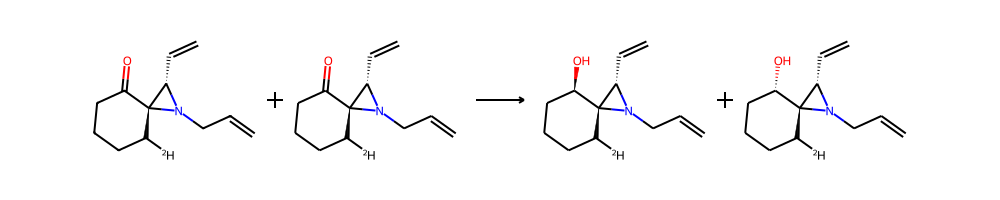

Largest Reactant MW                                    192.28
Reagent                               sodium tetrahydroborate
Solvent (Reaction Details)                           methanol
Time (Reaction Details) [h]                               0.5
Temperature (Reaction Details) [C]                          0
Yield                                  26 percent; 26 percent
Name: 0, dtype: object
Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=C&query=CNR.CNR%3D6019852&database=RX&origin=ReaxysOutput&ln=

Reaction Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=R&query=RX.ID%3D4490693&database=RX&origin=ReaxysOutput&ln=

Reaction ID: 4489690


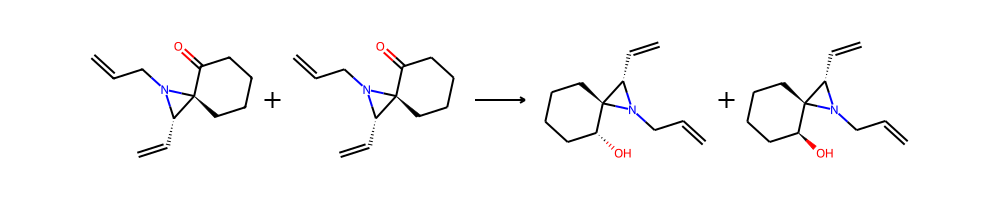

Largest Reactant MW                                   191.274
Reagent                               sodium tetrahydroborate
Solvent (Reaction Details)                           methanol
Time (Reaction Details) [h]                               0.5
Temperature (Reaction Details) [C]                          0
Yield                                  40 percent; 40 percent
Name: 1, dtype: object
Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=C&query=CNR.CNR%3D6019852&database=RX&origin=ReaxysOutput&ln=

Reaction Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=R&query=RX.ID%3D4489690&database=RX&origin=ReaxysOutput&ln=



In [7]:
Number_of_reaction_to_view = 2   #if number less than data size, it will randomnly pick.

duplicate = 'drop duplicate' #not matter at this stage

view_reactionScheme(SingleReduc_sort_Ref_count[SingleReduc_sort_Ref_count['Reaction ID'].isin({
    4490693,
4489690
})], Number_of_reaction_to_view, duplicate)